In [4]:
import gc

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader

from data.loader import Precious
from data.transforms import simple_transform
from models.vanilla_unet import VanillaUNet

In [6]:
net = VanillaUNet().cuda()
net.load_state_dict(torch.load('/mnt/d_drive/Drive/Code/Dark-Sight/DarkNet/results/runs/2020-03-07 10:16:52.pth'))
trainset = Precious(simple_transform)
trainloader = DataLoader(trainset, batch_size=1, shuffle=True)
dataset = trainset.__getitem__(140)

In [7]:
short = dataset['short_img'].unsqueeze(0)
temps = dataset['temps_img'].unsqueeze(0).unsqueeze(0)
long = dataset['long_img'].unsqueeze(0)

In [4]:
criterion = nn.L1Loss().cuda()
optim = Adam(net.parameters(), 1e-4)
epochs = 1000

In [5]:
out = net(short, temps)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


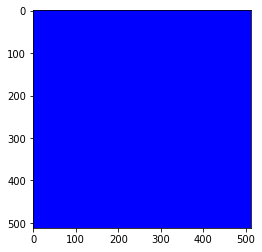

In [6]:
plt.imshow(out.squeeze(0).cpu().detach().numpy().transpose(1, 2, 0) * 255)

In [7]:
for epoch in range(epochs):
    out = net(short, temps)
    loss = criterion(out, long)
    gc.collect()
    optim.zero_grad()
    loss.backward()
    optim.step()
    print(f"Epoch : {epoch} Loss : {loss.item()}")

Epoch : 0 Loss : 0.29490208625793457
Epoch : 1 Loss : 0.29274603724479675
Epoch : 2 Loss : 0.2906298339366913
Epoch : 3 Loss : 0.2885556221008301
Epoch : 4 Loss : 0.28648680448532104
Epoch : 5 Loss : 0.28446468710899353
Epoch : 6 Loss : 0.2824469208717346
Epoch : 7 Loss : 0.28043076395988464
Epoch : 8 Loss : 0.27843213081359863
Epoch : 9 Loss : 0.27639004588127136
Epoch : 10 Loss : 0.2742816209793091
Epoch : 11 Loss : 0.2720828652381897
Epoch : 12 Loss : 0.2697750926017761
Epoch : 13 Loss : 0.2673715353012085
Epoch : 14 Loss : 0.2648802399635315
Epoch : 15 Loss : 0.2622934877872467
Epoch : 16 Loss : 0.25960052013397217
Epoch : 17 Loss : 0.2567899227142334
Epoch : 18 Loss : 0.2538599967956543
Epoch : 19 Loss : 0.2507737874984741
Epoch : 20 Loss : 0.2474726140499115
Epoch : 21 Loss : 0.243866965174675
Epoch : 22 Loss : 0.2399100959300995
Epoch : 23 Loss : 0.23557095229625702
Epoch : 24 Loss : 0.23067793250083923
Epoch : 25 Loss : 0.2250705063343048
Epoch : 26 Loss : 0.21889559924602509
E

KeyboardInterrupt: 

In [8]:
out = net(short, temps)

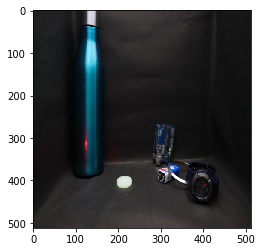

In [18]:
dataset = trainset.__getitem__(np.random.randint(0, 147))
plt.imshow(dataset['long_img'].cpu().numpy().transpose((1, 2, 0)))

In [19]:
short = dataset['short_img'].unsqueeze(0)
temps = dataset['temps_img'].unsqueeze(0).unsqueeze(0)
long = dataset['long_img'].unsqueeze(0)

In [20]:
out = net(short, temps)

In [21]:
plt.imsave('enhanced.jpg', np.clip(out.squeeze(0).cpu().detach().numpy().transpose(1, 2, 0), 0, 1))